# K Nearest Neighbors
-> predicts the class of a given test observation by identifying the observations that are nearest to it

In [129]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

In [130]:
df = pd.read_csv('./filez/Classified_Data.csv', index_col=0)
df.head(3)

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0


## Standardize Data
We standardize values (also known as **feature scaling**) because KNN uses distance metrics to determine the "closeness" of data points. If one feature has a much larger range of values than another, it can disproportionately influence the distance calculation, effectively giving it more importance in the decision of which neighbors are nearest (e.g.: a feature ranging from 0 to 1000 will influence the distance much more than a feature that ranges from 0 to 1.)

By standardizing the features (such as by using z-score standardization or min-max scaling), we ensure that each feature contributes equally to the distance calculations, allowing the KNN algorithm to make more balanced and accurate predictions. This is especially important when the features are in different units or scales.

The cost of scaling comes in the form of computational overhead and the possible loss of interpretability. Scaled data can be harder to interpret because it no longer has the original units. However, for many algorithms, including KNN, the benefits of scaling typically outweigh these costs.

In [131]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [132]:
# drop target class to leave only the feature columns
scaler.fit(df.drop('TARGET CLASS', axis=1))

StandardScaler()

In [133]:
# standardize data by centring & scaling
scaled_features = scaler.transform(df.drop('TARGET CLASS', axis=1))

In [134]:
scaled_features

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [135]:
# recreate the features df (slice means all features except the last one)
df_feat = pd.DataFrame(scaled_features, columns=df.columns[:-1])
df_feat.head(3)

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850


## KNN Model

In [136]:
from sklearn.model_selection import train_test_split

X = df_feat
y = df['TARGET CLASS']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=101
)

In [137]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [138]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

## Evaluate Model

In [139]:
pred = knn.predict(X_test)

In [140]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       159
           1       0.94      0.89      0.92       141

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300

[[151   8]
 [ 15 126]]


## Find a better K-value

In [141]:
# find the best K value
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    # average of where my predictions are not equal to the test values
    # See ref1 at the bottom of this notebook page
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

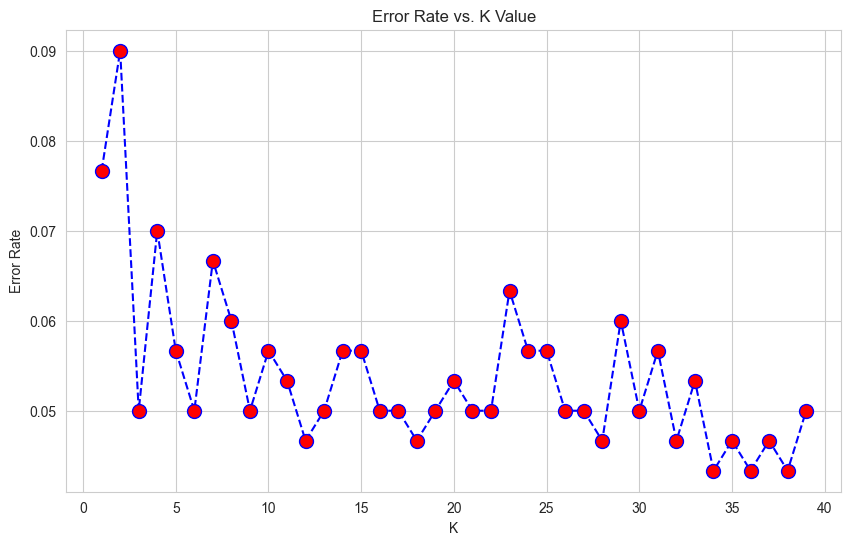

In [142]:
plt.figure(figsize=(10, 6))
plt.plot(
    range(1, 40),
    error_rate,
    color="blue",
    linestyle="dashed",
    marker="o",
    markerfacecolor="red",
    markersize=10,
)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

# the error range is already quite low, that's why it's a bit bumpy between 0 - 40

In [143]:
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print(f'{classification_report(y_test, pred)}\n')
print(confusion_matrix(y_test, pred))
# so K=17 is better than 1

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       159
           1       0.96      0.94      0.95       141

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300


[[153   6]
 [  9 132]]


In [144]:
# REF1:

# Actual values (y_test)
y_test = np.array([1, 0, 1, 1, 0, 0, 1, 0, 1, 0])

# Predicted values (pred_i) with some errors
pred_i = np.array([1, 1, 1, 0, 0, 0, 1, 1, 1, 0])

# Calculating the error rate
# First, we create a boolean array where True indicates a wrong prediction
errors = pred_i != y_test

# Now we calculate the mean of this boolean array
error_rate = np.mean(errors)

# Display the boolean array and the error rate
print(f'errors array: {errors}\nerror rate:    {error_rate}')

errors array: [False  True False  True False False False  True False False]
error rate:    0.3
